## Linear Regression - Car Price Prediction

We are required to model the price of cars with the predictor variable that are part of the Car Sales transactions. It will be used by the company to predict the prices for new cars coming in for sale. 

In [56]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Exploratory Data Analysis and Pre-processing Steps

In [57]:
cars = pd.read_csv('CarPrice_Assignment.csv')
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [58]:
cars.shape

(205, 26)

In [59]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Data Pre-processing steps

In [60]:
# Splitting company name from CarName column

CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [61]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### Fixing invalid values
- There seems to be some spelling error in the CompanyName column.

    - `maxda` = `mazda`
    - `Nissan` = `nissan`
    - `porsche` = `porcshce`
    - `toyota` = `toyouta`
    - `vokswagen` = `volkswagen` =  `vw`

In [62]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('alfa-romero','alfa-romeo')
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [63]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Feature Engineering

In [64]:
# Derive New field - Fuel economy

cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

In [65]:
# Binning the Car Companies based on avg prices of each Company.

cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


## Find High Correlations between Features

In [66]:
# Check the corr values of final list of variables
import numpy as np
cor = cars.select_dtypes(include=[np.number]).corr()


In [67]:
# Find out the Fields with high correlation

correlated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.8:
            colname1 = cor.columns[i]
            colname2 = cor.columns[j]
            print(abs(cor.iloc[i, j]), "--", i, '--', j, '--', colname1, '--', colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)

0.874587475964264 -- 3 -- 2 -- carlength -- wheelbase
0.8411182684818453 -- 4 -- 3 -- carwidth -- carlength
0.8777284608306433 -- 6 -- 3 -- curbweight -- carlength
0.8670324646791233 -- 6 -- 4 -- curbweight -- carwidth
0.850594073426277 -- 7 -- 6 -- enginesize -- curbweight
0.8097686545377302 -- 11 -- 7 -- horsepower -- enginesize
0.8014561756662708 -- 13 -- 11 -- citympg -- horsepower
0.9713370423425045 -- 14 -- 13 -- highwaympg -- citympg
0.835305437204371 -- 15 -- 6 -- price -- curbweight
0.8741451426986426 -- 15 -- 7 -- price -- enginesize
0.8081381197889799 -- 15 -- 11 -- price -- horsepower
0.9938444201653043 -- 16 -- 13 -- fueleconomy -- citympg
0.9916921560568324 -- 16 -- 14 -- fueleconomy -- highwaympg


In [68]:
print(cor.columns)
print('------')
print(correlated_features)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy'],
      dtype='object')
------
{'wheelbase', 'carwidth', 'carlength', 'enginesize', 'fueleconomy', 'horsepower', 'citympg', 'curbweight', 'price', 'highwaympg'}


In [69]:
cor['highwaympg']['citympg']

np.float64(0.9713370423425045)

In [70]:
corh = cars[list(correlated_features)].corr()


<Axes: >

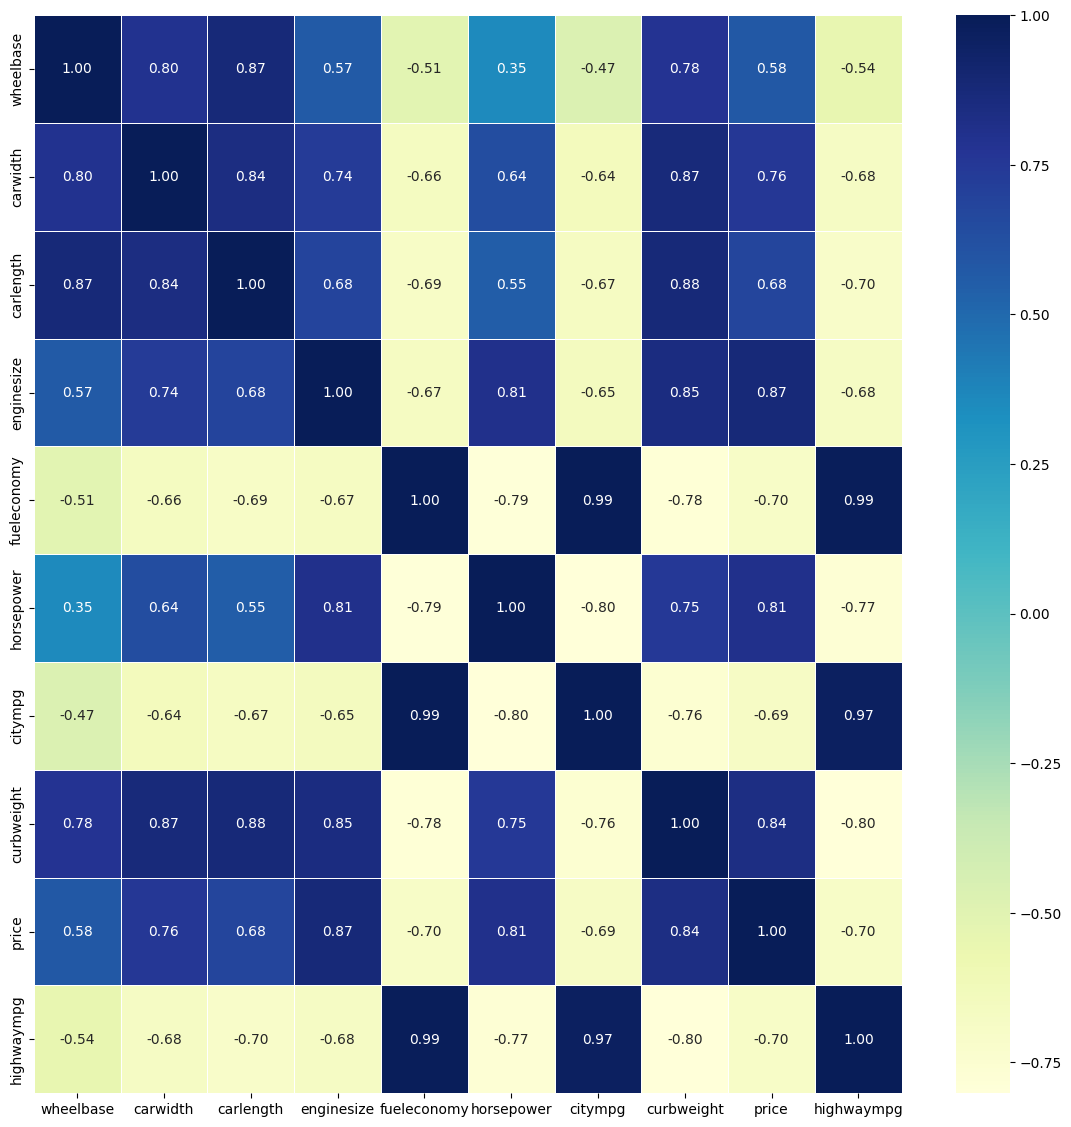

In [71]:
# Produce a Heatmap

plt.figure(figsize=(14,14)) 
sns.heatmap(corh, annot=True, linewidths=.5, fmt=".2f", cmap="YlGnBu")

### Feature Engineering: Create Dummy Variables for Ordinal Variables

In [72]:
print(cars['fueltype'].unique())
print(cars['aspiration'].unique())
print(cars['carbody'].unique())
print(cars['drivewheel'].unique())
print(cars['enginetype'].unique())
print(cars['cylindernumber'].unique())
print(cars['carsrange'].unique())
print(cars['fuelsystem'].unique())
print(cars['CompanyName'].unique())
print(cars['doornumber'].unique())
print(cars['enginelocation'].unique())

['gas' 'diesel']
['std' 'turbo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['Medium', 'Highend', 'Budget']
Categories (3, object): ['Budget' < 'Medium' < 'Highend']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
['two' 'four']
['front' 'rear']


In [73]:
# Defining the map function

def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

# Applying the function to the cars_lr

cars_lr = cars
cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)
cars_lr = dummies('CompanyName',cars_lr)
cars_lr = dummies('doornumber',cars_lr)
cars_lr = dummies('enginelocation',cars_lr)
cars_lr = dummies('fuelsystem',cars_lr)

In [74]:
cars_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 69 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    int64  
 16  fueleconomy       205 non-null    float64
 1

In [75]:
cars_lr.shape

(205, 69)

## Train-Test Split and Feature Scaling

In [76]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'carheight', 'stroke', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [78]:
df_train.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,volvo,two,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,123,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,...,False,False,False,True,False,False,False,False,False,False
125,126,3,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,...,False,True,False,False,False,False,False,True,False,False
166,167,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,...,False,True,False,False,False,False,False,True,False,False
1,2,3,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,...,False,True,False,False,False,False,False,True,False,False
199,200,-1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,...,True,False,False,False,False,False,False,True,False,False


In [79]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

## Model Building

In [80]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
def build_model(X,y):
    X = sm.add_constant(X) # Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary())    # model summary
    return lm
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [82]:
X_train = X_train.astype(float)
y_train = y_train.astype(float)


### Create the first model and clean up features with Colinearity

In [83]:
model1 = build_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     57.58
Date:                Thu, 03 Jul 2025   Prob (F-statistic):           3.34e-49
Time:                        12:40:01   Log-Likelihood:                 282.04
No. Observations:                 143   AIC:                            -446.1
Df Residuals:                      84   BIC:                            -271.3
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4193      0.205  

In [84]:
X_train.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'fueleconomy', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five',
       'four', 'six', 'three', 'twelve', 'two', 'Medium', 'Highend', 'audi',
       'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'two', 'rear', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [85]:
X_train1 = X_train.drop(
['car_ID', 'wheelbase', 'carlength', 'compressionratio', 'horsepower', 'citympg', 'highwaympg', 'hardtop',
 'sedan','wagon','fwd','rwd','dohcv','l','ohc','ohcf','ohcv','six','Medium',
'audi','buick','chevrolet','dodge','honda','isuzu','jaguar','mazda','nissan','porsche','renault','saab',
 'subaru','toyota','volkswagen','volvo','two','2bbl','4bbl','idi','mfi','mpfi','spdi'], axis=1)

#### Re-create the model after dropping the columns with 'P>|t|' > 0.05

In [86]:
model2 = build_model(X_train1, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     111.3
Date:                Thu, 03 Jul 2025   Prob (F-statistic):           2.01e-69
Time:                        12:40:01   Log-Likelihood:                 239.59
No. Observations:                 143   AIC:                            -431.2
Df Residuals:                     119   BIC:                            -360.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4296      0.103     -4.165      

### Feature Elimination using RFE (Recursive Feature Elimination)
Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model’s coef_ or feature_importances_ attributes, and by recursively eliminating a small number of features per loop, RFE attempts to eliminate dependencies and collinearity that may exist in the model.

In [87]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train1, y_train)


In [88]:
X_train1.columns[rfe.support_]

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'rotor', 'three',
       'twelve', 'Highend', 'bmw', 'rear'],
      dtype='object')

In [89]:
rfe.support_

array([False,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True, False, False,  True,  True,  True,
        True, False, False, False, False,  True, False])

In [90]:
X_train1.columns

Index(['symboling', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'peakrpm', 'fueleconomy', 'gas', 'turbo',
       'hatchback', 'rotor', 'five', 'four', 'three', 'twelve', 'Highend',
       'bmw', 'mercury', 'mitsubishi', 'peugeot', 'plymouth', 'rear', 'spfi'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [91]:
X_train_rfe = X_train[X_train1.columns[rfe.support_]]
X_train_rfe.head()

,carwidth,curbweight,enginesize,boreratio,rotor,three,twelve,Highend,bmw,rear
122,0.291667,0.272692,0.139623,0.230159,0.0,0.0,0.0,0.0,0.0,0.0
125,0.666667,0.500388,0.339623,1.000000,0.0,0.0,0.0,1.0,0.0,0.0
166,0.308333,0.314973,0.139623,0.444444,0.0,0.0,0.0,0.0,0.0,0.0
1,0.316667,0.411171,0.260377,0.626984,0.0,0.0,0.0,0.0,0.0,0.0
199,0.575000,0.647401,0.260377,0.746032,0.0,0.0,0.0,0.0,0.0,0.0


#### Create Model using RFE returned Features

In [92]:
model4 = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     164.6
Date:                Thu, 03 Jul 2025   Prob (F-statistic):           1.94e-69
Time:                        12:40:01   Log-Likelihood:                 202.89
No. Observations:                 143   AIC:                            -383.8
Df Residuals:                     132   BIC:                            -351.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1329      0.018     -7.455      0.0

p-vale of `twelve` seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [93]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

#### Recreate Model

In [94]:
model5 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     183.2
Date:                Thu, 03 Jul 2025   Prob (F-statistic):           1.99e-70
Time:                        12:40:01   Log-Likelihood:                 202.50
No. Observations:                 143   AIC:                            -385.0
Df Residuals:                     133   BIC:                            -355.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1323      0.018     -7.435      0.0

In [95]:
X_train_new = sm.add_constant(X_train_new) # Adding the constant
y_train_pred = model5.predict(X_train_new)

## Prediction using Test Data

In [96]:
df_test

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,volvo,two,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
160,161,0,95.7,166.3,64.4,53.0,2094,98,3.19,3.03,...,False,False,False,True,False,False,False,False,False,False
186,187,2,97.3,171.7,65.5,55.7,2275,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
59,60,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,...,False,True,False,True,False,False,False,False,False,False
165,166,1,94.5,168.7,64.0,52.6,2265,98,3.24,3.08,...,False,True,False,False,False,False,False,True,False,False
140,141,2,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,29,-1,103.3,174.6,64.6,59.8,2535,122,3.34,3.46,...,False,False,False,True,False,False,False,False,False,False
29,30,3,95.9,173.2,66.3,50.2,2811,156,3.60,3.90,...,False,True,False,False,False,False,True,False,False,False
182,183,2,97.3,171.7,65.5,55.7,2261,97,3.01,3.40,...,False,True,False,False,False,True,False,False,False,False
40,41,0,96.5,175.4,62.5,54.1,2372,110,3.15,3.58,...,False,False,False,False,False,False,False,False,False,False


In [97]:
# Scaling the test set

num_vars = ['carwidth', 'curbweight', 'enginesize', 'boreratio', 'price', 'rotor', 'three', 'Highend', 'bmw', 'rear']

df_test1 = pd.DataFrame(scaler.fit_transform(df_test[num_vars]), columns=num_vars) 

In [98]:
df_test1

,carwidth,curbweight,enginesize,boreratio,price,rotor,three,Highend,bmw,rear
0,0.200000,0.132148,0.082969,0.515873,0.058474,0.0,0.0,0.0,0.0,0.0
1,0.315789,0.219125,0.131004,0.515873,0.077398,0.0,0.0,0.0,0.0,0.0
2,0.421053,0.271985,0.187773,0.674603,0.086148,0.0,0.0,0.0,0.0,0.0
3,0.157895,0.214320,0.082969,0.555556,0.097473,0.0,0.0,0.0,0.0,0.0
4,0.136842,0.202307,0.126638,0.857143,0.055099,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
57,0.221053,0.344065,0.187773,0.634921,0.088048,0.0,0.0,0.0,0.0,0.0
58,0.400000,0.476694,0.336245,0.841270,0.189120,0.0,0.0,0.0,0.0,0.0
59,0.315789,0.212398,0.078603,0.373016,0.059399,0.0,0.0,0.0,0.0,0.0
60,0.000000,0.265738,0.135371,0.484127,0.122397,0.0,0.0,0.0,0.0,0.0


In [99]:
#Dividing into X and y

y_test = df_test1.pop('price')
X_test = df_test1

In [100]:
y_test

0     0.058474
1     0.077398
2     0.086148
3     0.097473
4     0.055099
        ...   
57    0.088048
58    0.189120
59    0.059399
60    0.122397
61    0.790705
Name: price, Length: 62, dtype: float64

In [101]:
# Now let's use our model to make predictions.

X_test_new = pd.DataFrame(sm.add_constant(X_test))

In [102]:
X_test_new

,const,carwidth,curbweight,enginesize,boreratio,rotor,three,Highend,bmw,rear
0,1.0,0.200000,0.132148,0.082969,0.515873,0.0,0.0,0.0,0.0,0.0
1,1.0,0.315789,0.219125,0.131004,0.515873,0.0,0.0,0.0,0.0,0.0
2,1.0,0.421053,0.271985,0.187773,0.674603,0.0,0.0,0.0,0.0,0.0
3,1.0,0.157895,0.214320,0.082969,0.555556,0.0,0.0,0.0,0.0,0.0
4,1.0,0.136842,0.202307,0.126638,0.857143,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
57,1.0,0.221053,0.344065,0.187773,0.634921,0.0,0.0,0.0,0.0,0.0
58,1.0,0.400000,0.476694,0.336245,0.841270,0.0,0.0,0.0,0.0,0.0
59,1.0,0.315789,0.212398,0.078603,0.373016,0.0,0.0,0.0,0.0,0.0
60,1.0,0.000000,0.265738,0.135371,0.484127,0.0,0.0,0.0,0.0,0.0


In [103]:
# Making predictions
y_pred = model5.predict(X_test_new)

### Model Performance Comparisn between Train and Test (Generalisation)

In [104]:
from sklearn.metrics import r2_score 
print("Test Prediction R-Sqrd: ", r2_score(y_test, y_pred))


Test Prediction R-Sqrd:  0.8606328550795908


In [105]:
print("Train Prediction R-Sqrd: ", r2_score(y_train, y_train_pred))

Train Prediction R-Sqrd:  0.9253685182104617


#### Inference :

- R-sqaured value for Training data is `92.5%` and for Test Data it is `86%`.
- This scores are fairly decent, however, you can investigate further to achieve better generalisation. 

### Our Final Model

In [106]:
print(model5.summary())




                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     183.2
Date:                Thu, 03 Jul 2025   Prob (F-statistic):           1.99e-70
Time:                        12:40:01   Log-Likelihood:                 202.50
No. Observations:                 143   AIC:                            -385.0
Df Residuals:                     133   BIC:                            -355.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1323      0.018     -7.435      0.0

In [107]:
import pickle

In [108]:
#Assuming 'model' is your trained LinearRegression model
with open('car_price_model.pkl','wb') as f:
    pickle.dump(model5, f)

In [109]:
#Split features and target

In [111]:
#save model
with open('car_price_model.pkl','wb') as file:            #dump->save   .ipynb
    pickle.dump(model5, file)

In [ ]:
pip install streamlit

  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached jsonschema-4.24.0-py3-none-any.whl.metadata (7.8 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached jsonschema_specifications-2025.4.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached referencing-0.36.2-py3-none-any.whl.metadata (2.8 kB)
   ------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import streamlit as st
import pickle
import pandas as pd
import numpy as np

#load the model(adjust path as needed)
model=pickle.load(open('car_price_model.pkl','rb'))

st.title("Car Price Prediction")
st.write("Enter the car details to predict its price.")

2025-06-21 13:10:57.927 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 13:10:58.266 
  command:

    streamlit run C:\Users\HII\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-21 13:10:58.267 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 13:10:58.268 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 13:10:58.269 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 13:10:58.270 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 13:10:58.271 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
#Example input fields (customize based on your model features)

year=st.number_input("Year of Puchase",min_value=1990, max_value=2025, value=2015)
present_price=st.number_input("Present Price(in lakhs)",value=5.0)
kms_driven=st.number_input("Kilometers Driven",value=30000)
owner=st.selectbox("Number of Previous Owners",[0,1,2,3])
fuel_type=st.selectbox("Fuel Type",['Petrol','Diesel','CNG'])
seller_type=st.selectbox("Seller Type",['Dealer','Individual'])
transmission=st.selectbox("Transmission Type",['Manual','Automatic'])

2025-06-21 13:17:30.538 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 13:17:30.539 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 13:17:30.541 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 13:17:30.542 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 13:17:30.543 Session state does not function when running a script without `streamlit run`
2025-06-21 13:17:30.545 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 13:17:30.546 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 13:17:30.546 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 13:17

In [ ]:
#Preprocess categorical variables (match model's format)

fuel_type_petrol=fuel_type='Petrol'
fuel_type_diesel=fuel_type=='Diesel'

In [113]:
model5.predict([[1.0	,0.157895,	0.214320,	0.082969,	0.555556,	0.0,	0.0,	0.0,	0.0,	0.0
]])

array([-0.02795643])